🌱 인프런 📚 모두의 한국어 텍스트 분석과 자연어처리 with 파이썬 🐍 https://inf.run/FX4TP


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/python-text-analysis/blob/main/0103-wordcloud-klue-re-pecab-output.ipynb)


## 라이브러리 로드

In [1]:
# !pip install koreanize-matplotlib

In [2]:
# 필요 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 로드
* [KLUE Benchmark](https://klue-benchmark.com/)

In [3]:
# read_json 으로 url 데이터 불러오기
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"
df = pd.read_json(url)
df.shape

(45678, 7)

In [4]:
print(url)

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


In [5]:
# head
# df[:5]
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


In [6]:
# duplicated 로 중복데이터가 있는지 확인합니다.
df[df.duplicated(subset=["title"])]

,guid,title,predefined_news_category,label,annotations,url,date


In [7]:
# 결측치를 확인합니다.
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

## 텍스트 길이 분석

In [8]:
# 단어 길이 
df["title_len"] = df["title"].str.len()

In [9]:
# 토큰 개수
df["title_token_count"] = df["title"].str.split().str.len()

In [10]:
df[["title_len", "title_token_count"]].describe()

,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [11]:
df[df["title_len"] == 4]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


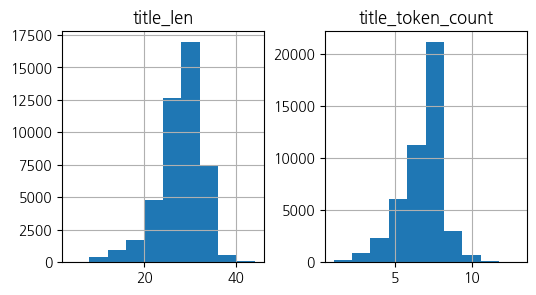

In [12]:
df.hist(figsize=(6, 3), bins=10);

In [13]:
df[df["title_len"] == df["title_len"].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


## 워드클라우드 시각화
* https://github.com/amueller/word_cloud

In [14]:
# 텍스트 하나로 만들기
news_title = " ".join(df["title"])
news_title[:100]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과'

In [15]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

# !apt -qq -y install fonts-nanum

import platform

# 운영체제에 따른 한글 폰트 경로 설정
if platform.system() == 'Windows':
    # Windows 운영체제의 경우
    font_path = r'C:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    # macOS의 경우
    font_path = r'/Library/Fonts/AppleGothic.ttf'
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
else:
    # Linux 또는 기타 운영체제의 경우 (예: 'NanumBarunGothic')
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

### 불용어 처리 시 의미가 왜곡되지 않도록 주의가 필요

In [16]:
from wordcloud import WordCloud

stopwords = ['하지만', '그리고', '그런데', '저는','제가',
             '그럼', '이런', '저런', '합니다',
             '많은', '많이', '정말', '너무', '수', '등', '것']

def display_word_cloud(data, width=1200, height=500):
    word_cloud = WordCloud(font_path=font_path, 
                          width=width, 
                          height=height, 
                          stopwords=stopwords,
                          background_color="white",
                          random_state=42
                         ).generate(data)
    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

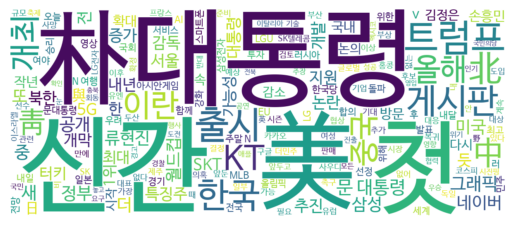

In [17]:
display_word_cloud(news_title)

In [18]:
df["label"].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [19]:
df["label"].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [20]:
subject_title = " ".join(df.loc[df["label"] == "생활문화", "title"])
subject_title[:100]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 미세먼지 속 출근길 예스24 독자'

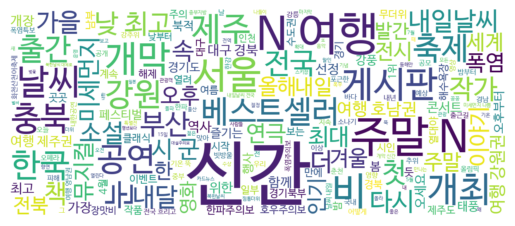

In [21]:
display_word_cloud(subject_title)

## 정규표현식으로 전처리

In [22]:
# 숫자 제거하기 [0-9], \d
# 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]
# df["title"].str.replace("[0-9]", "", regex=True)
df["title2"] = df["title"].str.replace(r"\d", "", regex=True)
df["title3"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " ", regex=True)

## 정규표현식 전처리 후 워드클라우드 시각화

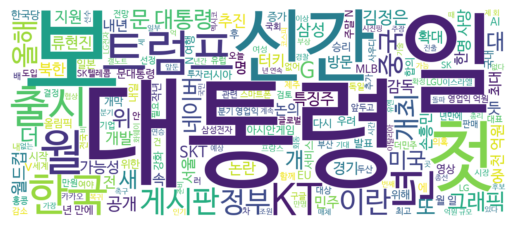

In [23]:
display_word_cloud(" ".join(df["title3"]))

## 형태소 분석기로 특정 품사만 추출하기

* [hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [24]:
# !pip install pecab

In [25]:
df.loc[df["title_len"] == df["title_len"].max(), "title"]

5792     美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보
20168    그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위
28257    주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비
30493    MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매
Name: title, dtype: object

In [26]:
df.loc[20168, "title"]

'그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위'

In [27]:
from pecab import PeCab
pecab = PeCab()
pecab.nouns(df.loc[20168, "title"])

['그래픽', '네이처', '세계', '연구', '기관', '년', '평가', '발표', '서울대', '국내', '위', '세계', '위']

In [28]:
df_society = df.loc[
    df["label"] == "사회"].sample(1000, random_state=42).copy()
df_society.shape

(1000, 11)

In [29]:
# 명사추출하기
from tqdm import tqdm
tqdm.pandas()
df_society["title_nouns"] = df_society["title"].progress_map(
    lambda x : " ".join(pecab.nouns(x)))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.44it/s]


In [30]:
df_society["title_nouns"]

45317          국가 재원 나라 배움터 러닝 올해 학습 서비스 시작
17300    장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보
20660                       양제츠 자리 안내 정의 실장
6542              건강 기능 식품 광고 사전 심의 사전 검열 위
11095                  거래소 안랩 성실 공시 법인 미 지정
                        ...                
14563              직장 핵심 기술 경동나비엔 연구원 심도 실형
22511                중국 언론 김동연 부총리 강연 조명 환호
22422                             부스 황창규 회장
8233          당국 핀테크 위크 참여 레그 테크 섭 테크 기업 모집
27685                      리콜 집단 소송 참가자 천 명
Name: title_nouns, Length: 1000, dtype: object

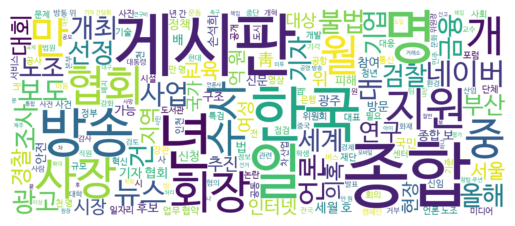

In [31]:
display_word_cloud(" ".join(df_society["title_nouns"]))

## 워드클라우드 마스크처리

* https://github.com/amueller/word_cloud/blob/main/examples/masked.py

### 마스크 이미지 다운로드

In [32]:
import requests
from PIL import Image

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 데이터를 받아옵니다
response = requests.get(mask_img_path)

# HTTP 요청이 성공했는지 확인합니다
if response.status_code == 200:
    # 응답으로 받은 데이터를 파일로 저장합니다
    with open("alice_mask.png", "wb") as file:
        file.write(response.content)

mask_img = np.array(Image.open("alice_mask.png"))

In [33]:
print(mask_img_path)

https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png


In [34]:
mask_img.shape

(900, 900)

### 마스크 적용

In [35]:
def display_word_cloud_mask(data, stopwords=stopwords, mask=mask_img, width=1200, height=500):
    word_cloud = WordCloud(font_path=font_path,
                           width=width,
                           height=height,
                           stopwords=stopwords,
                           mask=mask_img,
                           background_color="white",
                           random_state=42
                         ).generate(data)
    plt.figure()
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

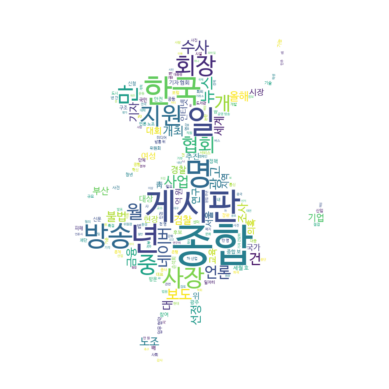

In [36]:
display_word_cloud_mask(" ".join(df_society["title_nouns"]))